ACC_Score 0.9239766081871345
Recall_Score 0.9351851851851852
Precision_Score 0.9439252336448598
F1_Score 0.9395348837209302


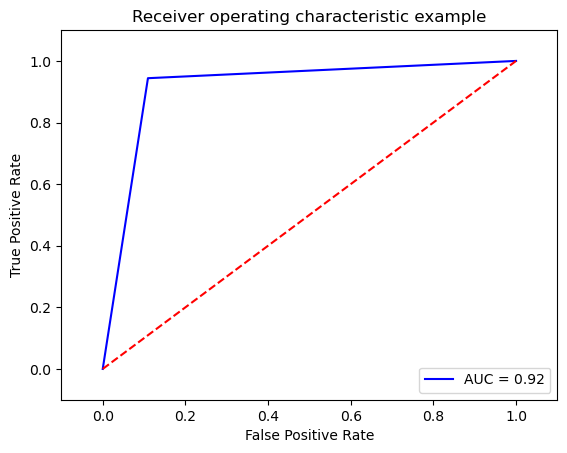

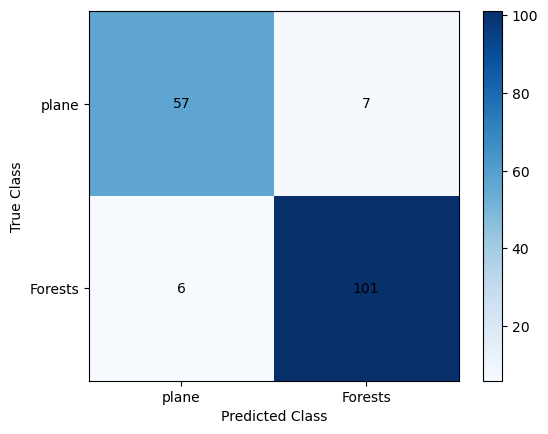

<Figure size 640x480 with 0 Axes>

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def predict(mlp, vector_x_test, y_test):
    # 预测
    y_predict = mlp.predict(vector_x_test)
    # 输出模型预测的准确率，召回率，
    print("ACC_Score", accuracy_score(y_predict, y_test))
    print("Recall_Score", recall_score(y_predict, y_test))
    print("Precision_Score", precision_score(y_predict, y_test))
    print("F1_Score", f1_score(y_predict, y_test))

    #ROC曲线
    y_probs = mlp.predict_proba(vector_x_test) #模型的预测得分
    y_probs = y_probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,y_probs)
    roc_auc = auc(fpr, tpr)  #auc为Roc曲线下的面积
    #开始画ROC曲线
    plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.xlabel('False Positive Rate') #横坐标是fpr
    plt.ylabel('True Positive Rate')  #纵坐标是tpr
    plt.title('Receiver operating characteristic example')
    plt.show()


    names = np.array(['plane', 'Forests'])
    # 绘制混淆矩阵（使用热力图）
    cm = confusion_matrix(y_test, y_predict) # 计算混淆矩阵
    plt.imshow(cm, cmap='Blues') # 绘制热力图
    plt.colorbar() # 显示颜色条
    plt.xticks([0, 1], names) # 设置x轴刻度和标签
    plt.yticks([0, 1], names) # 设置y轴刻度和标签
    plt.xlabel('Predicted Class') # 设置x轴标签
    plt.ylabel('True Class') # 设置y轴标签
    for i in range(2): # 在每个格子中显示数字
        for j in range(2):
            plt.text(j, i, cm[i][j], ha='center', va='center')
    plt.show()
    plt.savefig('Confusion matrix-MLP')

#导入乳腺癌数据集并划分训练集和测试集
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

#定义分类器
C45 = DecisionTreeClassifier(criterion='entropy')

#模型训练
C45.fit(X_train, y_train)

#模型结果
predict(C45,X_test,y_test)